In [2]:
import numpy as np
from src.task_1.quantum_simulator import QuantumSimulator, plot_benchmarks, benchmark_simulators
from src.task_1.quantum_observable import demonstrate_expectations

### Task 1 — Naive simulation using matrix multiplication and Advanced simulation using tensor multiplication

Matrix state: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Tensor state (flattened): [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Verifying Bell state creation:
Matrix state amplitudes: [0.707 0.    0.    0.707]

Measurement results: {'00': 528, '11': 472}


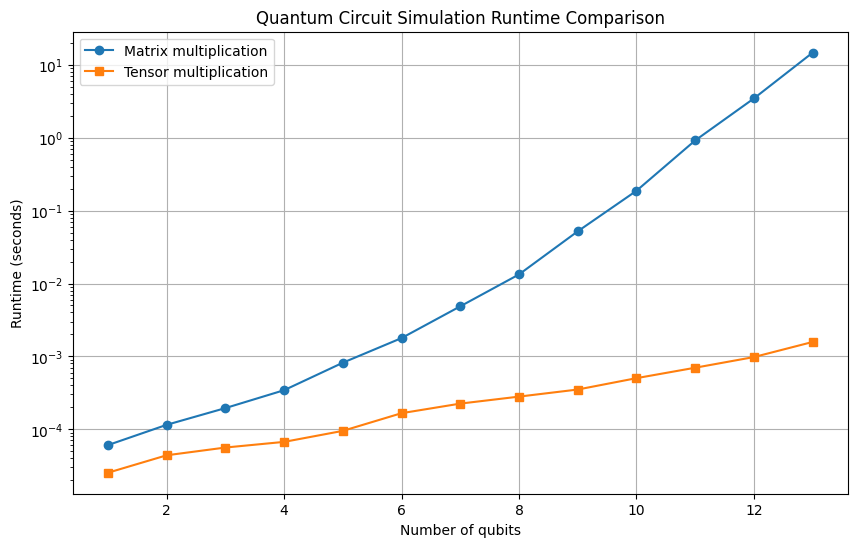

In [3]:
# Create simulator instance
simulator = QuantumSimulator()

# Test with a Bell state circuit
n_qubits = 2
bell_circuit = [
    ('H', 0),        # Hadamard on qubit 0
    ('CNOT', 0, 1)   # CNOT with control=0, target=1
]

# Run both simulation methods
matrix_state = simulator.simulate_circuit_matrix(n_qubits, bell_circuit)
tensor_state = simulator.simulate_circuit_tensor(n_qubits, bell_circuit)

# Print states (should match after flattening)
print("Matrix state:", matrix_state)
print("Tensor state (flattened):", tensor_state.flatten())

# Verify we get a Bell state (should be approximately [0.707, 0, 0, 0.707])
print("\nVerifying Bell state creation:")
print("Matrix state amplitudes:", np.round(np.abs(matrix_state), 3))

# Take measurements (should see roughly equal numbers of |00⟩ and |11⟩)
measurements = simulator.measure_state(matrix_state, shots=1000)
print("\nMeasurement results:", measurements)

# Run benchmarks
matrix_times, tensor_times = benchmark_simulators(max_qubits=13)
plot_benchmarks(matrix_times, tensor_times)

- Matrix multiplication method: O(2^2n) memory, very inefficient beyond ~15 qubits
- Tensor method: O(2^n) memory, can handle ~20-25 qubits
- Both methods are exact but limited by exponential scaling
- Tensor method generally performs better due to reduced memory requirements and more efficient local operations

### Bonus question

In [4]:
demonstrate_expectations()


Example 1: Single qubit in superposition (H|0⟩)
⟨X⟩ = 1.000
⟨Y⟩ = 0.000
⟨Z⟩ = -0.000

Example 2: Bell state (CNOT(H⊗I)|00⟩)
⟨Z₁Z₂⟩ = 1.000
⟨X₁X₂⟩ = 1.000
⟨Y₁Y₂⟩ = -1.000

Example 3: GHZ state
⟨Z₁Z₂Z₃⟩ = 0.000
⟨X₁X₂X₃⟩ = 1.000
⟨Z_1⟩ = 0.000
⟨Z_2⟩ = 0.000
⟨Z_3⟩ = 0.000


These examples demonstrate important quantum correlations:

- Single-qubit superposition shows how quantum states can have definite values along certain measurement axes.
- Bell states demonstrate quantum entanglement through perfect correlations.
- GHZ states show genuine three-party entanglement with interesting correlation properties.